# Predicción de Abandono de Clientes en Telecomunicaciones

Mediante este notebook se resumirá el desarrollo del grupo. Esto incluye todo el código implementado en detalle, figuras, tablas, gráficas y descripciones que representan el soporte estadístico para las conclusiones descritas en el informe central.

## Integrantes

*   Andrés Felipe Camargo Pinilla
*   David Santiago Gaona Pardo
*   Juan David Moreno Suárez
*   Santiago Sabogal Millan
*   Tomás Barón Galvis







## Análisis exploratorio

### Carga y limpieza de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://raw.githubusercontent.com/Tommybg/Proyecto2_Analitica/refs/heads/main/Telco-Customer-Churn-V2.csv"

df = pd.read_csv(url)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,No,No,No,45.0,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [ ]:
df["Contract"].unique()

array(['Month-to-month', "'One year'", "'Two year'"], dtype=object)

In [ ]:
# mostramos las primeras 5 lineas
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# imprimimos las columnas y el tipo de dato
print(df.info())

| gender   | SeniorCitizen   | Partner   | Dependents   | tenure   | PhoneService   | MultipleLines      | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod               | MonthlyCharges   | TotalCharges   | Churn   |
|:---------|:----------------|:----------|:-------------|:---------|:---------------|:-------------------|:------------------|:-----------------|:---------------|:-------------------|:--------------|:--------------|:------------------|:---------------|:-------------------|:----------------------------|:-----------------|:---------------|:--------|
| Female   | No              | Yes       | No           | 1        | No             | 'No phone service' | DSL               | No               | Yes            | No                 | No            | No            | No                | Month-to-month | Yes                | 'Electronic check'        

A continuación se exploran y se describen todas las variables presentes en la base de datos:

- **gender (object):** Género del cliente (Masculino/Femenino).

- **SeniorCitizen (object):** Indica si el cliente es una persona mayor (1: Sí, 0: No).

- **Partner (object):** Indica si el cliente tiene pareja (Yes/No).

- **Dependents (object):** Indica si el cliente tiene dependientes (Yes/No).

- **tenure (float64):** Cantidad de meses que el cliente ha estado con la compañía.

- **PhoneService (object):** Indica si el cliente tiene servicio telefónico (Yes/No).

- **MultipleLines (object):** Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).

- **InternetService (object):** Tipo de servicio de internet contratado (DSL/Fiber optic/No).

- **OnlineSecurity (object):** Indica si el cliente tiene seguridad en línea (Yes/No/No internet service).

- **OnlineBackup (object):** Indica si el cliente tiene respaldo en línea (Yes/No/No internet service).

- **DeviceProtection (object):** Indica si el cliente tiene protección de dispositivos (Yes/No/No internet service).

- **TechSupport (object):** Indica si el cliente tiene soporte técnico (Yes/No/No internet service).

- **StreamingTV (object):** Indica si el cliente tiene servicio de televisión en streaming (Yes/No/No internet service).

- **StreamingMovies (object):** Indica si el cliente tiene servicio de películas en streaming (Yes/No/No internet service).

- **Contract (object):** Tipo de contrato del cliente (Month-to-month/One year/Two year).

- **PaperlessBilling (object):** Indica si el cliente usa facturación electrónica (Yes/No).

- **PaymentMethod (object):** Método de pago utilizado (Bank transfer, Credit card, Electronic check, Mailed check).

- **MonthlyCharges (float64):** Cargo mensual que paga el cliente.

- **TotalCharges (object):** Cargo total acumulado del cliente.

- **Churn (object):** Indica si el cliente ha dejado el servicio (Yes/No).

En este punto, se procede con la conversión de los meses de Float a Enteros y del cargo total de Object a Float.

In [ ]:
# Convertir a entero
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').astype('Int64')

# Convertir a flotante
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')

# Mostrar la información del DataFrame para verificar el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        6959 non-null   object 
 4   tenure            6859 non-null   Int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    6881 non-null   object 
 9   OnlineBackup      6876 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       6881 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Una vez confirmadada la conversión, se prosigue con el tratamiento de datos faltantes.

In [ ]:
#Descripción de variables cuantitativas
desc_stats_before = df.describe()
print(desc_stats_before.to_markdown(numalign="left", stralign="left"))

|       | tenure   | MonthlyCharges   | TotalCharges   |
|:------|:---------|:-----------------|:---------------|
| count | 6859     | 6855             | 6666           |
| mean  | 32.3136  | 64.7962          | 2310.15        |
| std   | 24.5415  | 30.108           | 2280.3         |
| min   | 0        | 18.25            | 18.8           |
| 25%   | 9        | 35.575           | 411.638        |
| 50%   | 29       | 70.3             | 1410.72        |
| 75%   | 55       | 89.9             | 3857.81        |
| max   | 72       | 118.75           | 8684.8         |


#### Tratamiento de datos faltantes

In [ ]:
# Verificamos que columnas tienen datos faltantes o vacíos.
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,84
tenure,184
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,162
OnlineBackup,167


In [ ]:
# Calculamos el porcentaje que equivalen los datos faltantes
missing_percentage = df.isnull().mean() * 100

# Eliminamos las columnas que tengan mas del 30 porciento de datos faltantes
columns_to_drop = missing_percentage[missing_percentage > 30].index.tolist()
df = df.drop(columns=columns_to_drop)

print("Percentage of missing values in each column:")
print(missing_percentage.to_markdown(numalign="left", stralign="left"))
print(f"Columns dropped: {columns_to_drop}")

Percentage of missing values in each column:
|                  | 0       |
|:-----------------|:--------|
| gender           | 0       |
| SeniorCitizen    | 0       |
| Partner          | 0       |
| Dependents       | 1.19267 |
| tenure           | 2.61252 |
| PhoneService     | 0       |
| MultipleLines    | 0       |
| InternetService  | 0       |
| OnlineSecurity   | 2.30016 |
| OnlineBackup     | 2.37115 |
| DeviceProtection | 0       |
| TechSupport      | 2.30016 |
| StreamingTV      | 0       |
| StreamingMovies  | 0       |
| Contract         | 0       |
| PaperlessBilling | 0       |
| PaymentMethod    | 0       |
| MonthlyCharges   | 2.66932 |
| TotalCharges     | 5.35283 |
| Churn            | 0       |
Columns dropped: []


Una vez identificadas las columnas con datos faltantes, se realiza un proceso distinto para cada tipo de variable (cualitativa/cuantitativa).

Para las cuantitativas, se analiza la distribución de las variables.

In [ ]:
df_copy = df.copy()

# Eliminar filas con valores faltantes en bd_copy
df_copy = df_copy.dropna()

# Mostrar la información del DataFrame para verificar el cambio
df_copy.info()

# Verificar si quedan datos faltantes
df_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 5834 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5834 non-null   object 
 1   SeniorCitizen     5834 non-null   object 
 2   Partner           5834 non-null   object 
 3   Dependents        5834 non-null   object 
 4   tenure            5834 non-null   Int64  
 5   PhoneService      5834 non-null   object 
 6   MultipleLines     5834 non-null   object 
 7   InternetService   5834 non-null   object 
 8   OnlineSecurity    5834 non-null   object 
 9   OnlineBackup      5834 non-null   object 
 10  DeviceProtection  5834 non-null   object 
 11  TechSupport       5834 non-null   object 
 12  StreamingTV       5834 non-null   object 
 13  StreamingMovies   5834 non-null   object 
 14  Contract          5834 non-null   object 
 15  PaperlessBilling  5834 non-null   object 
 16  PaymentMethod     5834 non-null   object 
 17  

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


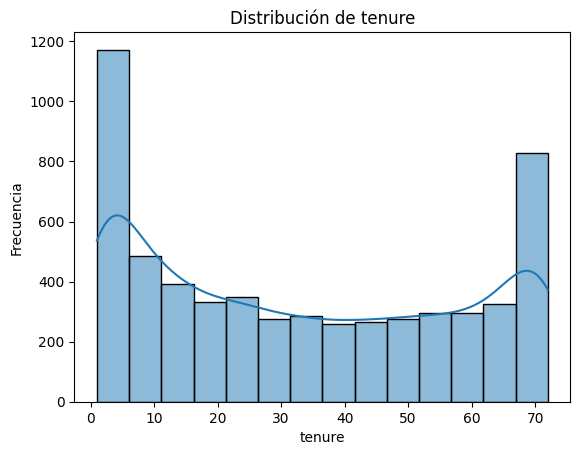

Kolmogorov-Smirnov test results for tenure: statistic = 0.8944593298276179, p-value = 0.0
tenure is not normally distributed (KS test)


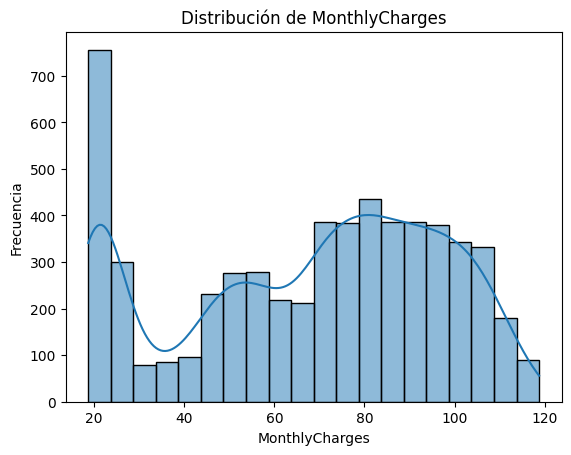

Kolmogorov-Smirnov test results for MonthlyCharges: statistic = 1.0, p-value = 0.0
MonthlyCharges is not normally distributed (KS test)


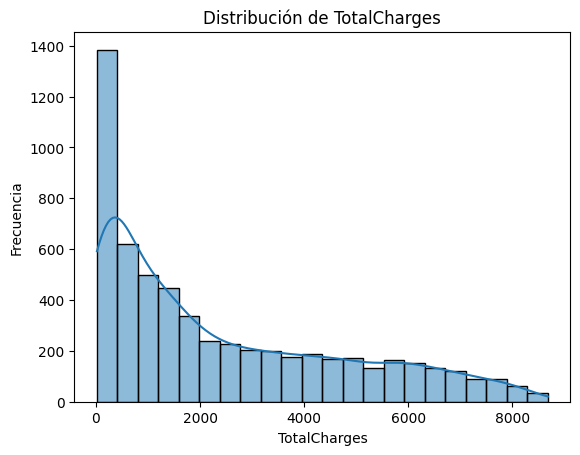

Kolmogorov-Smirnov test results for TotalCharges: statistic = 1.0, p-value = 0.0
TotalCharges is not normally distributed (KS test)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Creamos los histogramas con seaborn
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.histplot(data=df_copy, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    # Aplicamos la prueba de Kolmogorov-Smirnov
    statistic, p_value = kstest(df_copy[col], 'norm')

    # Imprimimos los resultados
    print(f"Kolmogorov-Smirnov test results for {col}: statistic = {statistic}, p-value = {p_value}")

    # Interpretamos los resultados
    alpha = 0.05
    if p_value > alpha:
        print(f"{col} is normally distributed (KS test)")
    else:
        print(f"{col} is not normally distributed (KS test)")

Dado que las pruebas arrojaron que los valores no siguen una distribución normal, es mejor imputar los valores con la mediana en lugar de usar la media, respecto a las variables cuantitativas.

In [ ]:
import numpy as np
import pandas as pd
# Guardar las estadísticas descriptivas antes de la imputación
desc_stats_before = df.describe()

# Imputar los valores faltantes con la mediana para las columnas especificadas
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    median_val = df[col].median()
    print(f"Imputando valores faltantes en {col} con la mediana: {median_val}")
    df[col] = df[col].fillna(median_val)

# Verificar si aún existen valores faltantes
missing_values_after = df.isnull().sum()
print("\nValores faltantes después de la imputación:")
print(missing_values_after)

# Calcular las estadísticas descriptivas después de la imputación
desc_stats_after = df.describe()

# Comparar las estadísticas descriptivas antes y después de la imputación
print("\nComparación de estadísticas descriptivas (Antes - Después):")
comparison_df = desc_stats_before - desc_stats_after
print(comparison_df)


Imputando valores faltantes en tenure con la mediana: 29.0
Imputando valores faltantes en MonthlyCharges con la mediana: 70.3
Imputando valores faltantes en TotalCharges con la mediana: 1410.725

Valores faltantes después de la imputación:
gender                0
SeniorCitizen         0
Partner               0
Dependents           84
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      162
OnlineBackup        167
DeviceProtection      0
TechSupport         162
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

Comparación de estadísticas descriptivas (Antes - Después):
         tenure  MonthlyCharges  TotalCharges
count    -184.0     -188.000000   -377.000000
mean   0.086569       -0.146913     48.144856
std    0.316976        0.391369     52.658964
min         0.0       

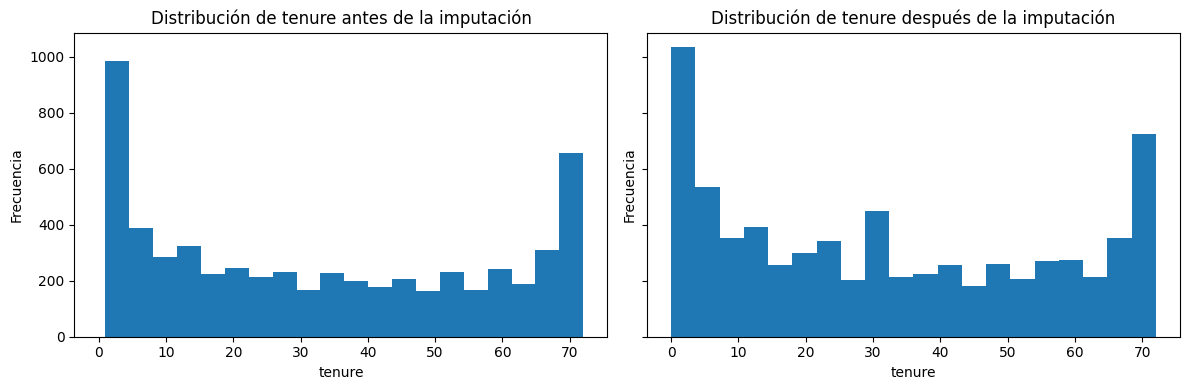

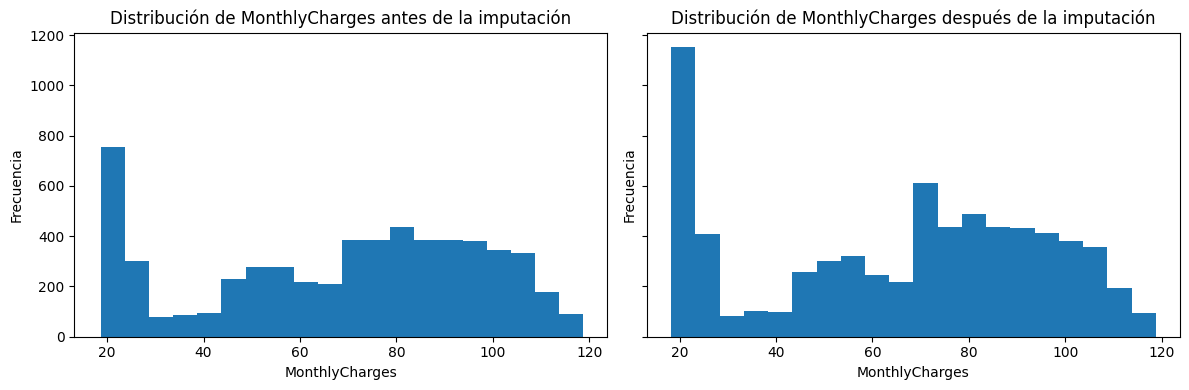

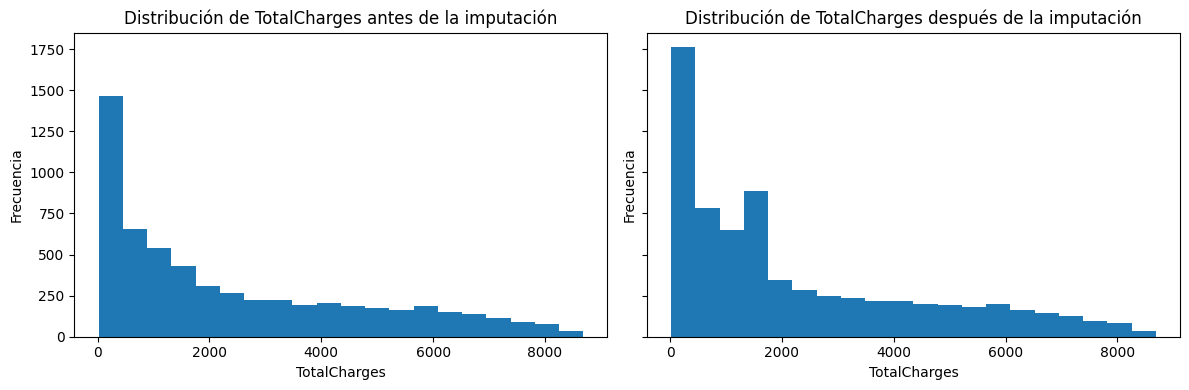

In [ ]:
# Crear histogramas para comparar las distribuciones antes y después de la imputación
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

    # Histograma antes de la imputación
    ax1.hist(df_copy[col], bins=20)
    ax1.set_title(f'Distribución de {col} antes de la imputación')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frecuencia')

    # Histograma después de la imputación
    ax2.hist(df[col], bins=20)
    ax2.set_title(f'Distribución de {col} después de la imputación')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Frecuencia')

    # Ajustar el espacio entre los subplots
    plt.tight_layout()

    plt.show()

Se puede observar que en las gráficas no se presentó un cambio significativo debido a la imputación. En cuanto a la comparación de estadísticas descriptivas, se puede evidenciar que hay pequeñas diferencias entre las estadísticas antes y después de la imputación. Estas diferencias se presentan debido a que la imputación con la mediana introduce nuevos valores en los datos. Sin embargo, las diferencias son del orden de los dos decimales, lo que sugiere que la imputación no ha generado grandes sesgos en los datos.

A continuación, se procede a tratar los datos faltantes de las variables cualitativas. Primero, se debe realizar un análisis de la distribución de la frecuencia para poder determinar su moda. Debido a que el porcentaje es menor al 5%, una opción viable que no recurra a la eliminación de datos es la imputación con moda.

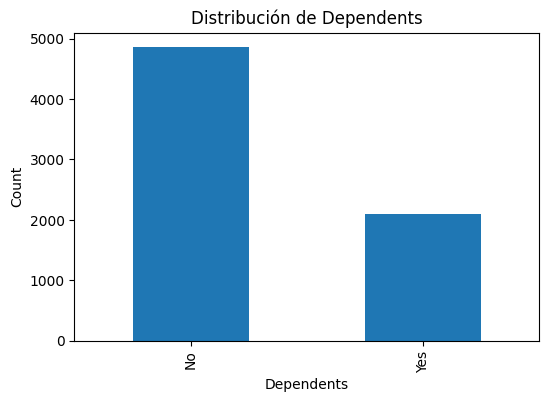

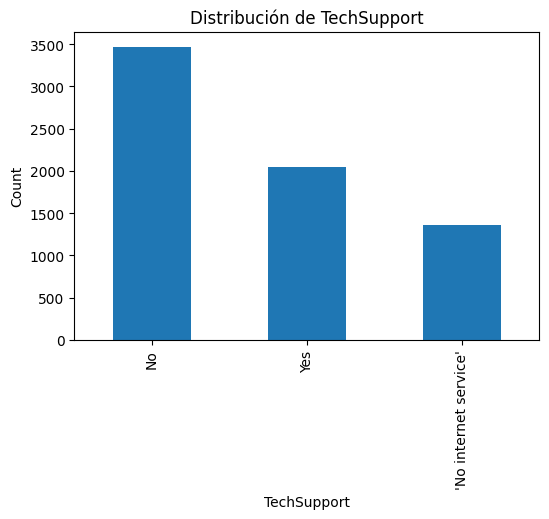

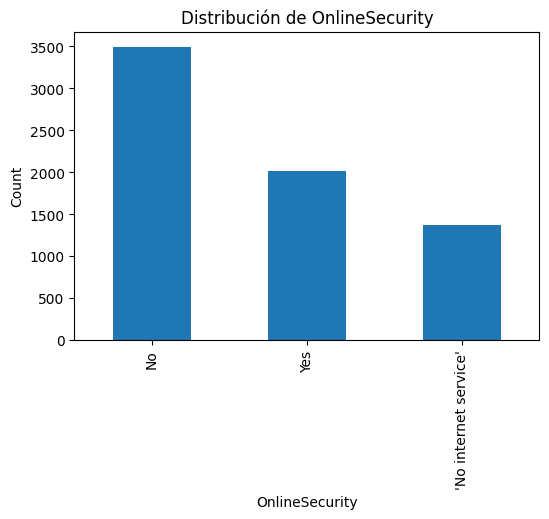

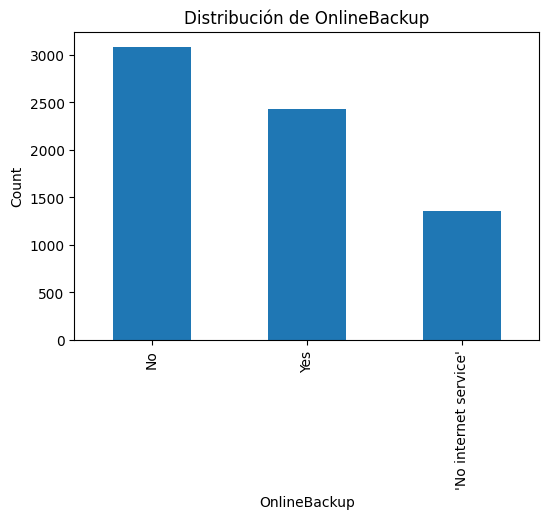

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df['Dependents'].value_counts().plot(kind='bar')
plt.title('Distribución de Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
df['TechSupport'].value_counts().plot(kind='bar')
plt.title('Distribución de TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
df['OnlineSecurity'].value_counts().plot(kind='bar')
plt.title('Distribución de OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
df['OnlineBackup'].value_counts().plot(kind='bar')
plt.title('Distribución de OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.show()

In [ ]:
# Imputar valores faltantes con la moda para las columnas especificadas
cols_to_impute = ['Dependents', 'TechSupport', 'OnlineSecurity', 'OnlineBackup']
for col in cols_to_impute:
    # Verificar si la columna tiene valores faltantes
    if df[col].isnull().any():
        # Obtener la moda de la columna
        mode_val = df[col].mode()[0]

        # Imputar los valores faltantes con la moda
        print(f"Imputando valores faltantes en {col} con la moda: {mode_val}")
        df[col] = df[col].fillna(mode_val)
    else:
        print(f"La columna {col} no tiene valores faltantes.")

# Verificar si aún existen valores faltantes DESPUÉS de la imputación con la moda
missing_values_after_mode = df.isnull().sum()
print("\nValores faltantes después de la imputación con la moda:")
print(missing_values_after_mode)

# Imprimir la información del DataFrame para verificar los tipos de datos
print("\nInformación del DataFrame:")
print(df.info())


Imputando valores faltantes en Dependents con la moda: No
Imputando valores faltantes en TechSupport con la moda: No
Imputando valores faltantes en OnlineSecurity con la moda: No
Imputando valores faltantes en OnlineBackup con la moda: No

Valores faltantes después de la imputación con la moda:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender           

Una vez se completado el proceso con los datos faltantes, se da inicio al tratamiento de los datos atípicos o outliers.

#### Tratamiento de datos atípicos

Los datos atípicos solo se presentan para las variables cuantitativas y se pueden eveidenciar al realizar un boxplot.

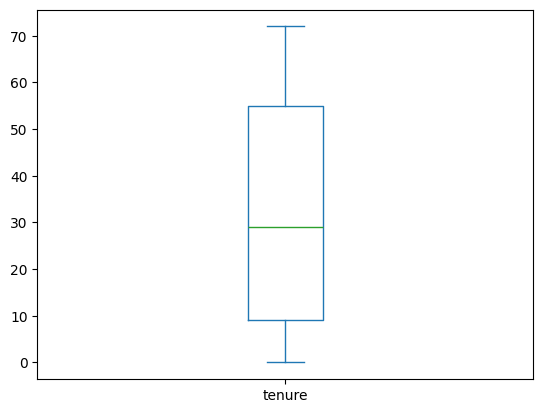

In [ ]:
#Boxplot para la variable tenure
boxplotEdad = df["tenure"].plot(kind="box")
plt.show()

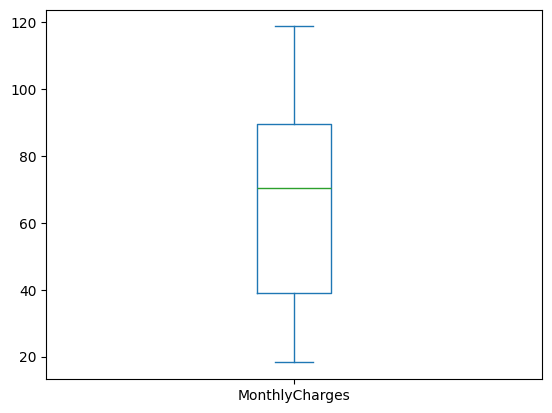

In [ ]:
#Boxplot para la variable MonthlyCharges
boxplotEdad = df["MonthlyCharges"].plot(kind="box")
plt.show()

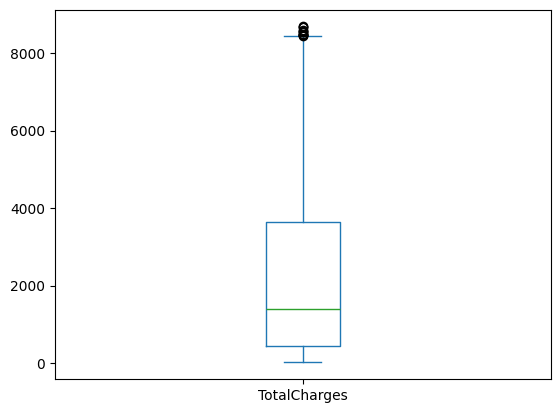

In [ ]:
#Boxplot para la variable MonthlyCharges
boxplotEdad = df["TotalCharges"].plot(kind="box")
plt.show()

Solo TotalCharges tiene datos atípicos. A continuación, se obtiene el porcentaje de atípicos.

In [ ]:
# Se seleccionan todas las variables que sean Numericas
columnasNumericas = df.select_dtypes(include=['number']).columns

# Se calculan sus cuartiles
Q1 = df[columnasNumericas].quantile(0.25)
Q3 = df[columnasNumericas].quantile(0.75)

# Con los cuartiles calculamos el rango intercuartil (IQR)
IQR = Q3 - Q1

# Identificamos la cantidad de Datos que se encuentran fuera del rango entre el Q1 y el Q3, a estos los consideramos Atípicos
outliers = (df[columnasNumericas] < (Q1 - 1.5 * IQR)) | (df[columnasNumericas] > (Q3 + 1.5 * IQR))

# Calculamos la cantidad de Atípicos que hay en cada variable
porcentajeAtipicos = (outliers.sum() / df.shape[0]) * 100
porcentajeAtipicos

,0
tenure,0.0
MonthlyCharges,0.0
TotalCharges,0.18458


Al ser un valor de atípicos tan bajo (0.18%) es posible imputarlo con los percentiles 5 y 95.

In [ ]:
import numpy as np

# Se imputan los datos con los percentiles 5 y 95
def imputar_outliers_percentiles(df, columna):
    p5 = df[columna].quantile(0.05)
    p95 = df[columna].quantile(0.95)

    df[columna] = np.clip(df[columna], p5, p95)

columnasFinales = ["TotalCharges"]

for col in columnasFinales:
    imputar_outliers_percentiles(df, col)

Comprobación final.

In [ ]:
# Se seleccionan todas las variables que sean Numericas
columnasNumericas = df.select_dtypes(include=['number']).columns

# Se calculan sus cuartiles
Q1 = df[columnasNumericas].quantile(0.25)
Q3 = df[columnasNumericas].quantile(0.75)

# Con los cuartiles calculamos el rango intercuartil (IQR)
IQR = Q3 - Q1

# Identificamos la cantidad de Datos que se encuentran fuera del rango entre el Q1 y el Q3, a estos los consideramos Atípicos
outliers = (df[columnasNumericas] < (Q1 - 1.5 * IQR)) | (df[columnasNumericas] > (Q3 + 1.5 * IQR))

# Calculamos la cantidad de Atípicos que hay en cada variable
porcentajeAtipicos = (outliers.sum() / df.shape[0]) * 100
porcentajeAtipicos

,0
tenure,0.0
MonthlyCharges,0.0
TotalCharges,0.0


### Preprocesamiento

Con los datos libres de faltantes y atípicos, podemos proceder con el preprocesamiento específico según el contexto dado.

Primero, se estipula que el valor de TotalCharges es igual a la multiplicación entre MonthlyCharges y tenure. Por ende, se realiza una imputación simple con esta condición.

In [ ]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

Seguido paso, se solicita la codificación de las variables categóricas con el método de pandas, get_dummies(). Con este método, podemos convertir todas las variables categóricas en formato numérico. Esta función es util para las variables que contienen más de una categoria, sin embargo las variables de categorias binarias funcionan mejor simplemente con el formato tradicional de 0 y 1.

Para empezar, se solicita que las variables del tipo Demográficas como gender, SeniorCitizen, Partner y Dependents sean tratadas con el método One-Hot Encoding. El One-Hot Encoding es una técnica de preprocesamiento utilizada para convertir variables categóricas en una representación numérica binaria. Cada categoría se convierte en una columna independiente con valores 0 o 1, indicando la presencia de esa categoría en una muestra.

Antes, de procesiguir realizamos una copia del dataframe.

In [ ]:
df_no_encoding = df.copy()

#### One-hot Encoding

Al realizar el One-hot encoding, se habilita drop_first para evitar colinealidad para el caso.

In [ ]:
# Aplicar One-Hot Encoding para tipo Demográficas
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen','Partner', 'Dependents'], drop_first=True)

#### Ordinal encoding

Prosiguiendo, se solicita que las variables del tipo Contrato como Contract, PaperlessBilling y PaymentMethod sean tratadas con el método de Ordinal Encoding. El Ordinal Encoding es una técnica de preprocesamiento utilizada para convertir variables categóricas en valores numéricos de manera ordenada. A cada categoría se le asigna un número entero en función de un orden lógico.

In [ ]:
df[['Contract', 'PaperlessBilling', 'PaymentMethod']]

,Contract,PaperlessBilling,PaymentMethod
0,Month-to-month,Yes,'Electronic check'
1,'One year',No,'Mailed check'
2,Month-to-month,Yes,'Mailed check'
3,'One year',No,'Bank transfer (automatic)'
4,Month-to-month,Yes,'Electronic check'
...,...,...,...
7038,'One year',Yes,'Mailed check'
7039,'One year',Yes,'Credit card (automatic)'
7040,Month-to-month,Yes,'Electronic check'
7041,Month-to-month,Yes,'Mailed check'


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Definir las columnas a transformar
contract_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Definir el orden de las categorías en cada columna
contract_order = ["Month-to-month", "'One year'", "'Two year'"]
payment_method_order = ["'Electronic check'", "'Mailed check'", "'Bank transfer (automatic)'", "'Credit card (automatic)'"]

# Crear el codificador
encoder = OrdinalEncoder(categories=[contract_order, ['No', 'Yes'], payment_method_order])

# Aplicar el encoding solo a las columnas específicas
df[contract_columns] = encoder.fit_transform(df[contract_columns])

# Convertir los valores a enteros
df[contract_columns] = df[contract_columns].astype(int)

#### Binary Encoding

A continuación, se solicita que las variables del tipo Uso de servicios sean tratadas con el método binario. Debido a que todas estas incluyen una categoria extras, simplemente se clasificará como 0, dependiendo el contexto.

In [ ]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Aplicar la conversión a binario
df[service_columns] = df[service_columns].replace({'Yes': 1, 'DSL':1, "'Fiber optic'":1, 'No': 0, "'No internet service'": 0, "'No phone service'": 0})

<ipython-input-26-4771e2b60f48>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service_columns] = df[service_columns].replace({'Yes': 1, 'DSL':1, "'Fiber optic'":1, 'No': 0, "'No internet service'": 0, "'No phone service'": 0})


Finalmente, se solicita que las variables de tipo Monetarias como tenure, MonthlyCharges y TotalCharges se traten de manera escalable, por ende no es necesario realizar más.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   Int64  
 1   PhoneService       7043 non-null   int64  
 2   MultipleLines      7043 non-null   int64  
 3   InternetService    7043 non-null   int64  
 4   OnlineSecurity     7043 non-null   int64  
 5   OnlineBackup       7043 non-null   int64  
 6   DeviceProtection   7043 non-null   int64  
 7   TechSupport        7043 non-null   int64  
 8   StreamingTV        7043 non-null   int64  
 9   StreamingMovies    7043 non-null   int64  
 10  Contract           7043 non-null   int64  
 11  PaperlessBilling   7043 non-null   int64  
 12  PaymentMethod      7043 non-null   int64  
 13  MonthlyCharges     7043 non-null   float64
 14  TotalCharges       7043 non-null   Float64
 15  Churn              7043 non-null   object 
 16  gender_Male        7043 

Realizamos una conversión de las variables booleanas y de objetos a int64.

In [ ]:
# Identify boolean columns that need conversion.
boolean_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to int64
for col in boolean_columns:
    df[col] = df[col].astype('int64')

df.info() # Verify the changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   Int64  
 1   PhoneService       7043 non-null   int64  
 2   MultipleLines      7043 non-null   int64  
 3   InternetService    7043 non-null   int64  
 4   OnlineSecurity     7043 non-null   int64  
 5   OnlineBackup       7043 non-null   int64  
 6   DeviceProtection   7043 non-null   int64  
 7   TechSupport        7043 non-null   int64  
 8   StreamingTV        7043 non-null   int64  
 9   StreamingMovies    7043 non-null   int64  
 10  Contract           7043 non-null   int64  
 11  PaperlessBilling   7043 non-null   int64  
 12  PaymentMethod      7043 non-null   int64  
 13  MonthlyCharges     7043 non-null   float64
 14  TotalCharges       7043 non-null   Float64
 15  Churn              7043 non-null   object 
 16  gender_Male        7043 

Por ultimo, transformamos la variable Churn a binaria.

In [ ]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
# Print some info
print(df.info())
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   Int64  
 1   PhoneService       7043 non-null   int64  
 2   MultipleLines      7043 non-null   int64  
 3   InternetService    7043 non-null   int64  
 4   OnlineSecurity     7043 non-null   int64  
 5   OnlineBackup       7043 non-null   int64  
 6   DeviceProtection   7043 non-null   int64  
 7   TechSupport        7043 non-null   int64  
 8   StreamingTV        7043 non-null   int64  
 9   StreamingMovies    7043 non-null   int64  
 10  Contract           7043 non-null   int64  
 11  PaperlessBilling   7043 non-null   int64  
 12  PaymentMethod      7043 non-null   int64  
 13  MonthlyCharges     7043 non-null   float64
 14  TotalCharges       7043 non-null   Float64
 15  Churn              7043 non-null   int64  
 16  gender_Male        7043 

<ipython-input-29-815ec283ea72>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


Verificamos existencia de nuevos valores faltantes.

In [ ]:
df.isnull().sum()

,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


In [ ]:
df

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes
0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0,0,1,0
1,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1936.3,0,1,0,0,0
2,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,107.7,1,1,0,0,0
3,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1903.5,0,1,0,0,0
4,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,141.4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,2035.2,0,1,0,1,1
7039,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7430.4,0,0,0,1,1
7040,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,325.6,0,0,0,1,1
7041,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,297.6,1,1,1,1,0


### Análisis univariado

Con los datos preprocesados, se procede con un análisis multivariado, separando variables cuantitativas y cualitativas. Respecto a las cuantitiativas, lo ideal es la realización de una matriz de correlación.

Primero, se va a realizar un análisis multivariado general con el dataframe que no codificamos para mejor claridad.

In [ ]:
# Calcula las estadísticas descriptivas para todas las columnas numéricas
descriptive_stats = df_no_encoding.describe()

# Muestra las estadísticas descriptivas
print("Estadísticas Ahora:")
print(descriptive_stats)
print(descriptive_stats.to_markdown(numalign="left", stralign="left"))

Estadísticas Ahora:
          tenure  MonthlyCharges  TotalCharges
count     7043.0     7043.000000        7043.0
mean   32.227034       64.943149   2267.517989
std    24.224531       29.716655   2231.349316
min          0.0       18.250000           0.0
25%          9.0       39.100000         418.4
50%         29.0       70.300000        1422.4
75%         55.0       89.600000        3672.9
max         72.0      118.750000        8550.0
|       | tenure   | MonthlyCharges   | TotalCharges   |
|:------|:---------|:-----------------|:---------------|
| count | 7043     | 7043             | 7043           |
| mean  | 32.227   | 64.9431          | 2267.52        |
| std   | 24.2245  | 29.7167          | 2231.35        |
| min   | 0        | 18.25            | 0              |
| 25%   | 9        | 39.1             | 418.4          |
| 50%   | 29       | 70.3             | 1422.4         |
| 75%   | 55       | 89.6             | 3672.9         |
| max   | 72       | 118.75           | 8550

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_no_encoding.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix = df_no_encoding[numeric_columns].corr()

# Mostrar la matriz de correlación
print(corr_matrix.to_markdown(numalign="left", stralign="left"))

|                | tenure   | MonthlyCharges   | TotalCharges   |
|:---------------|:---------|:-----------------|:---------------|
| tenure         | 1        | 0.242568         | 0.827311       |
| MonthlyCharges | 0.242568 | 1                | 0.648057       |
| TotalCharges   | 0.827311 | 0.648057         | 1              |


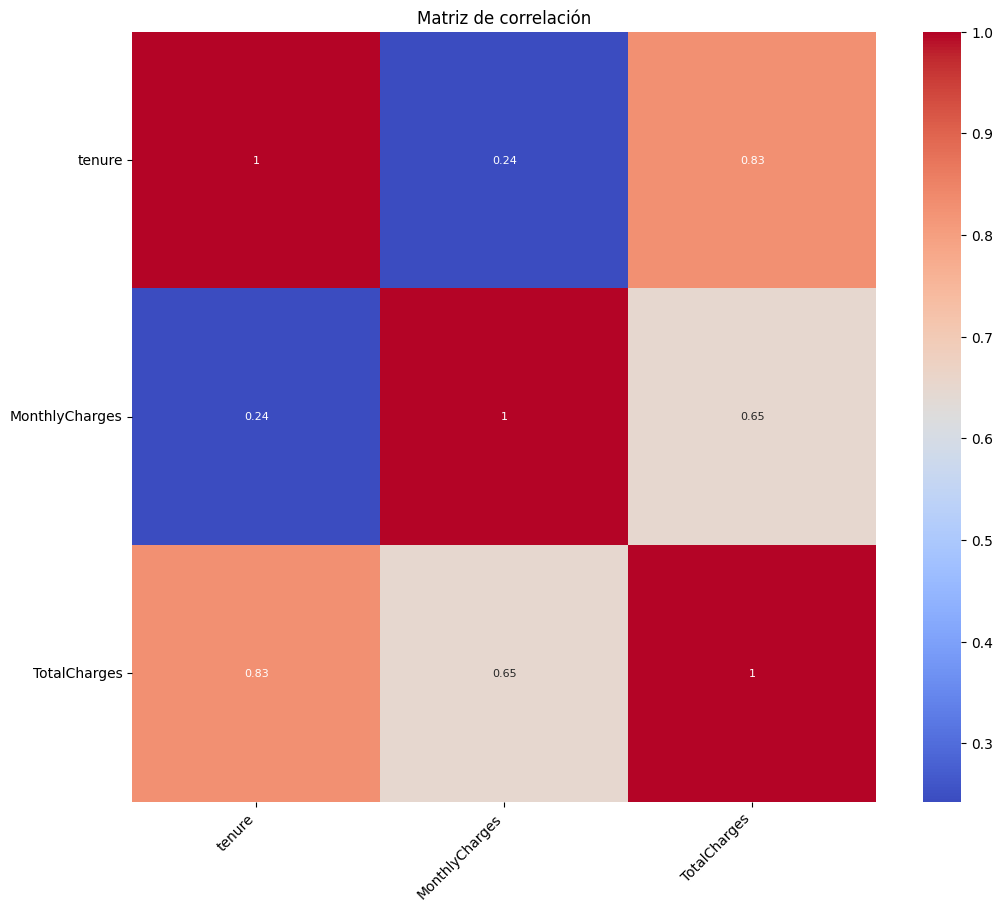

In [ ]:
# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm')  # Paleta de colores divergente
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Respecto a cualtitativas, lo ideal es una tabla de contigencia contra una variable que consideremos de respuesta. Para el contexto, la variable respuesta más acertiva es Churn.

In [ ]:
import pandas as pd

# Lista de variables categóricas (excluyendo 'Churn' para evitar duplicados)
categorical_vars = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
    "PaymentMethod"
]

# Crear tablas de contingencia
for var in categorical_vars:
    print(f"Tabla de Contingencia: {var} vs Churn")
    print(pd.crosstab(df_no_encoding[var], df_no_encoding['Churn'], normalize='index'))  # Normalizado por fila
    print("\n" + "-"*50 + "\n")


Tabla de Contingencia: gender vs Churn
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

--------------------------------------------------

Tabla de Contingencia: SeniorCitizen vs Churn
Churn                No       Yes
SeniorCitizen                    
No             0.763938  0.236062
Yes            0.583187  0.416813

--------------------------------------------------

Tabla de Contingencia: Partner vs Churn
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

--------------------------------------------------

Tabla de Contingencia: Dependents vs Churn
Churn             No       Yes
Dependents                    
No          0.687234  0.312766
Yes         0.846190  0.153810

--------------------------------------------------

Tabla de Contingencia: PhoneService vs Churn
Churn               No       Yes
PhoneService                    
No            0.750733  0.249

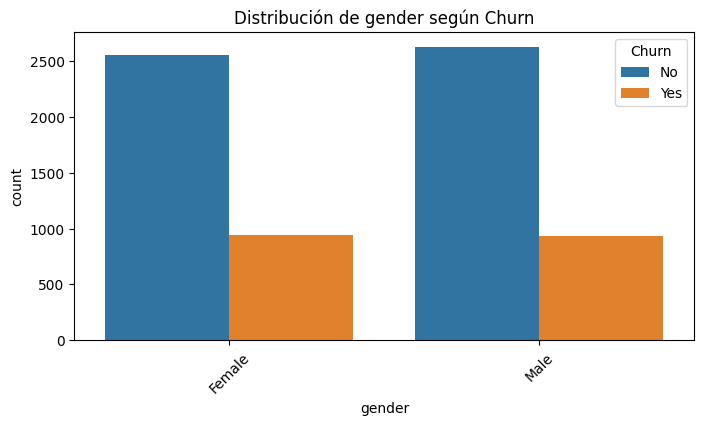

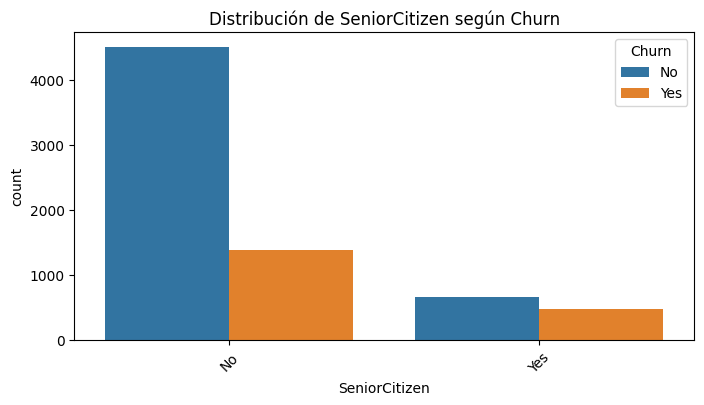

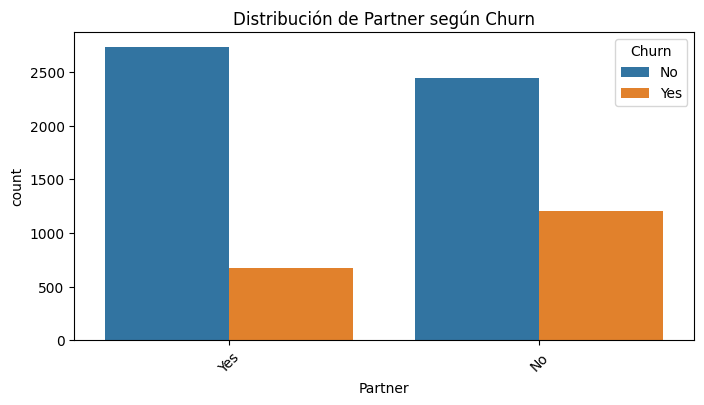

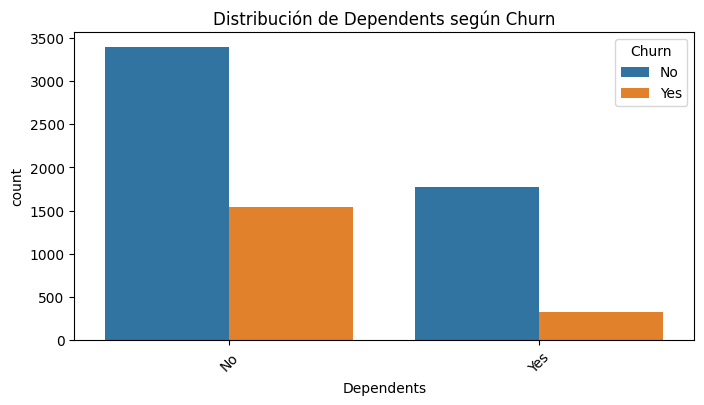

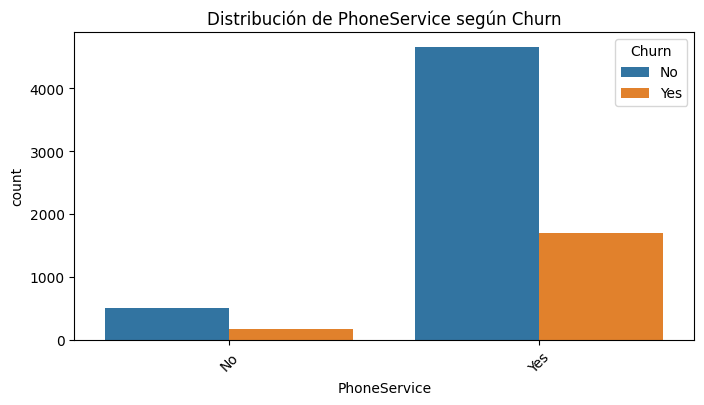

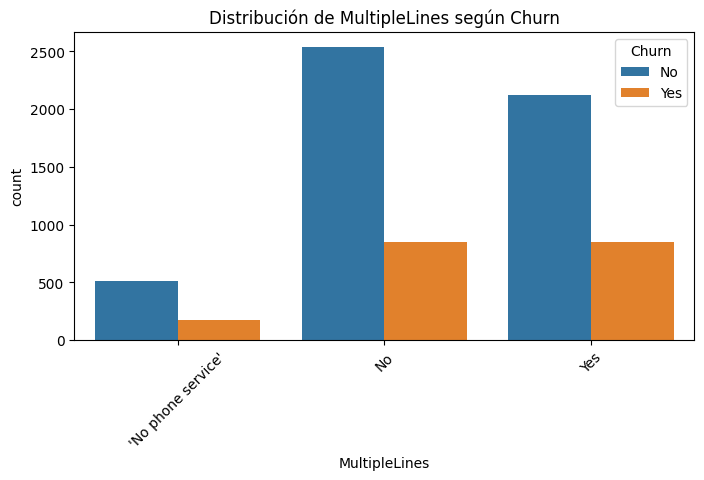

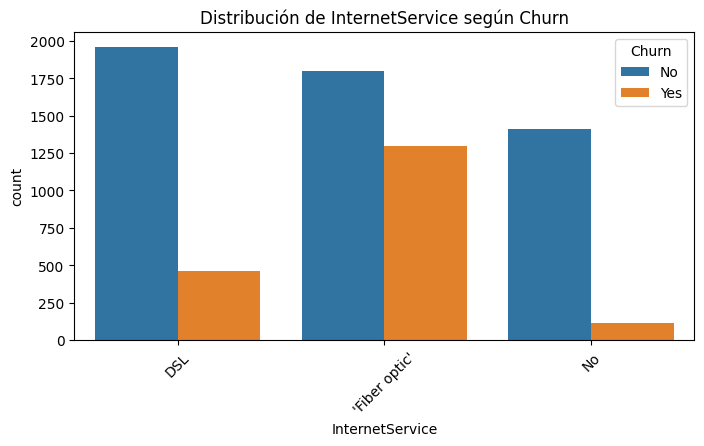

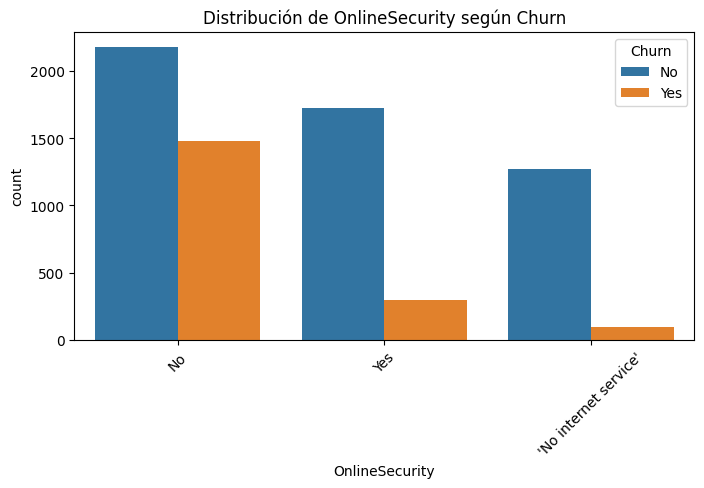

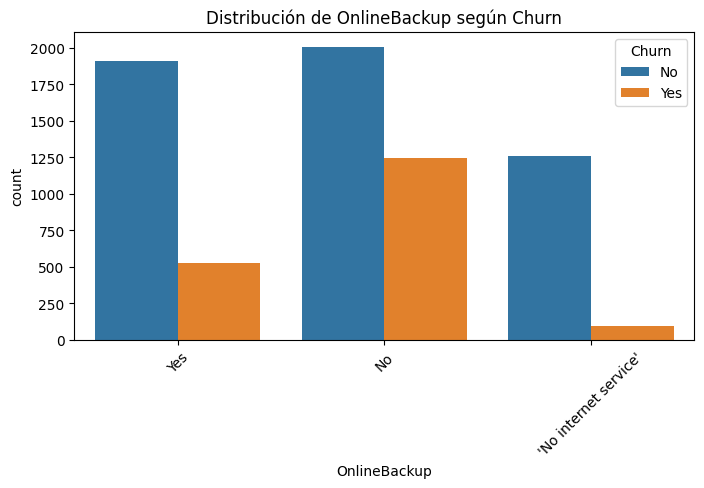

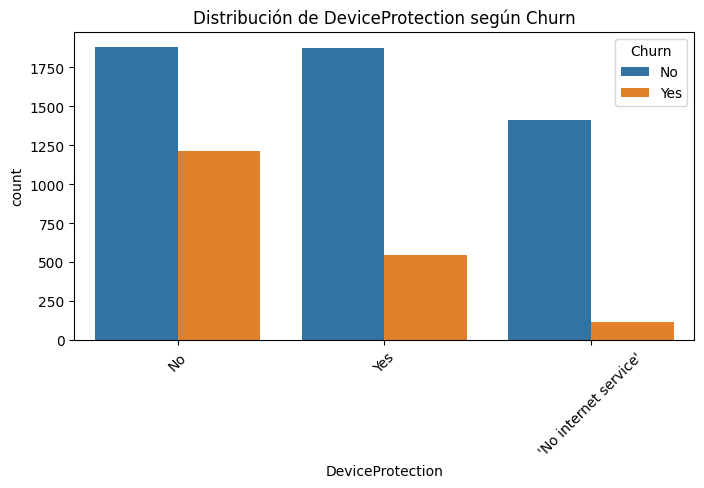

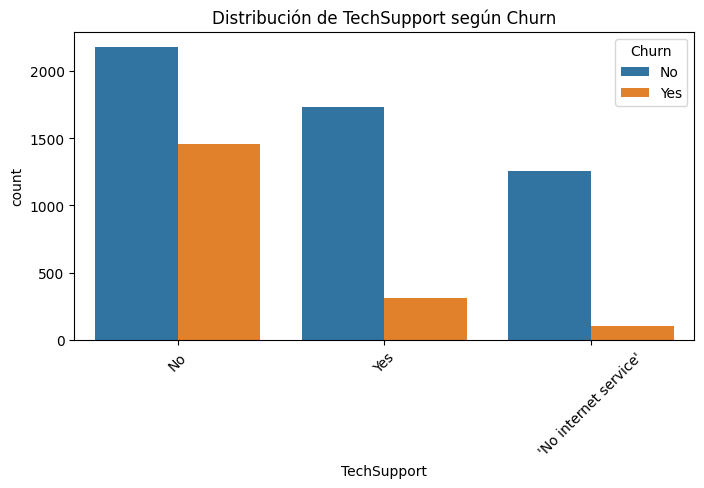

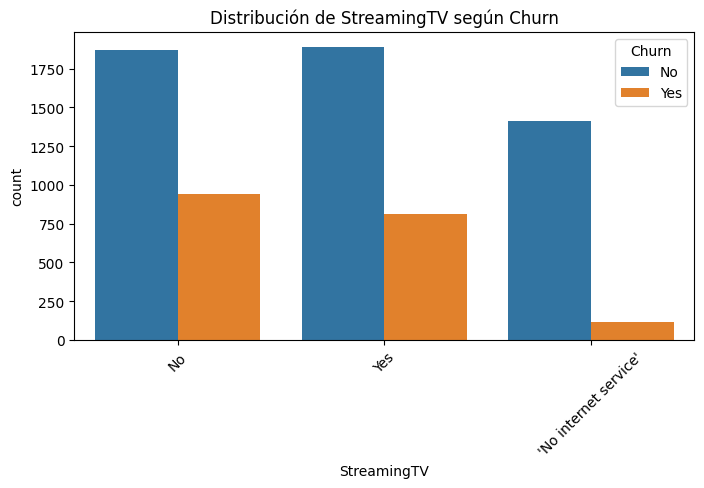

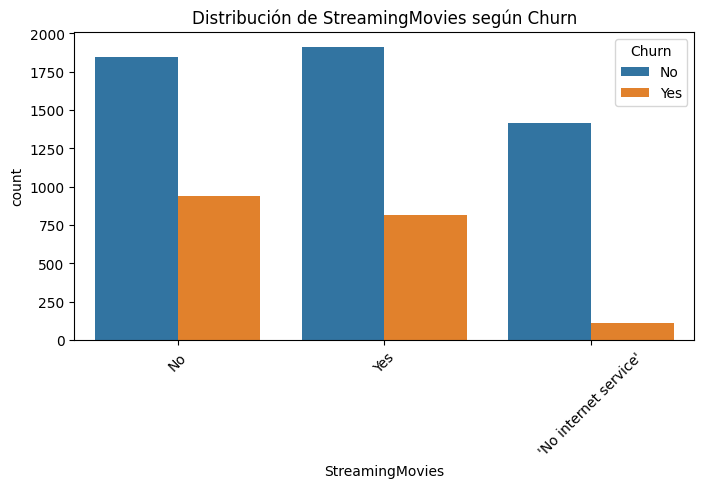

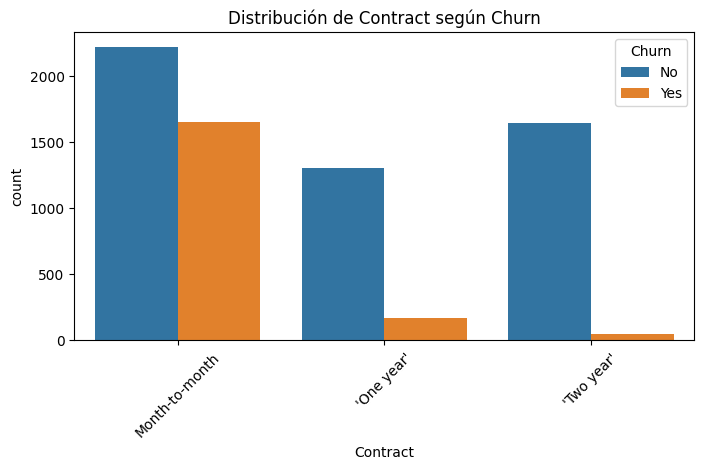

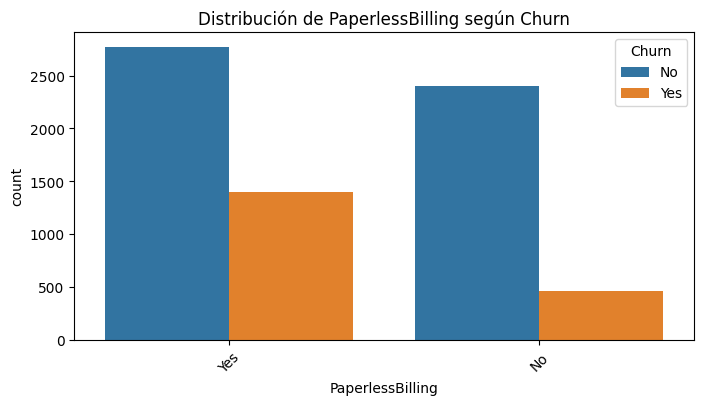

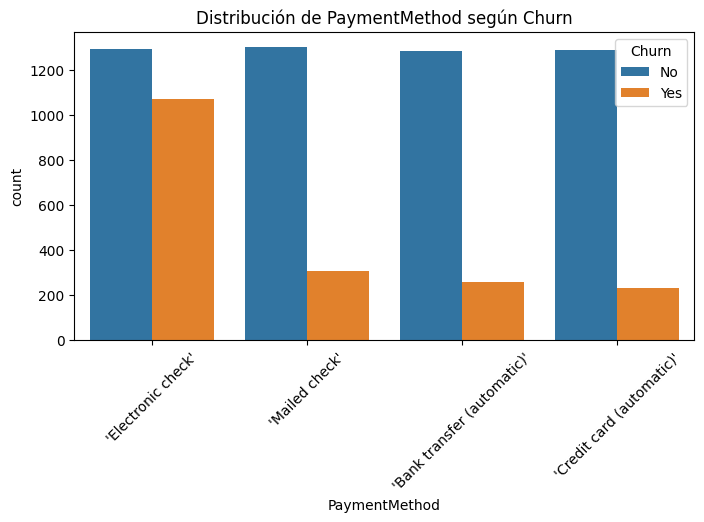

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='Churn', data=df_no_encoding)
    plt.title(f"Distribución de {var} según Churn")
    plt.xticks(rotation=45)
    plt.show()


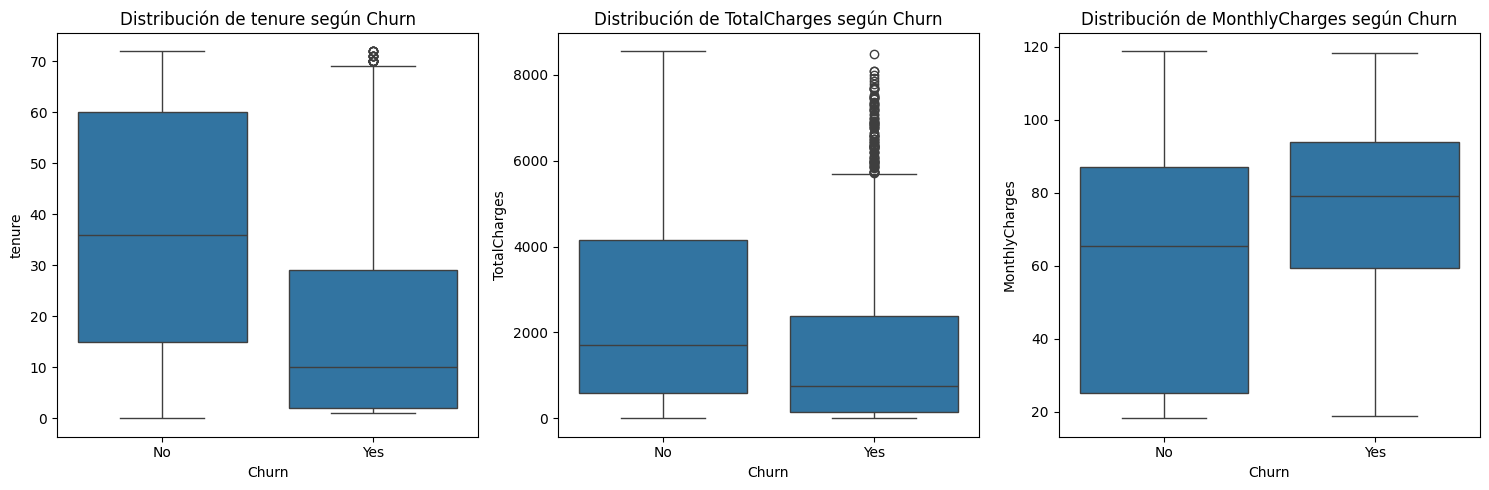

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas a analizar
numerical_vars = ["tenure", "TotalCharges", "MonthlyCharges"]

# Graficar Boxplots
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x="Churn", y=var, data=df_no_encoding)
    plt.title(f"Distribución de {var} según Churn")
plt.tight_layout()
plt.show()


Es evidenciable que las medianas dentro de cada una de las tres gráficas son diferentes, por ende es posible concluir que las variables numéricas tienen cierta influencia en Churn.

Seguido paso, se realizan tres gráficas de violinplot siguiendo el mismo esquema de numerico contra categorico de respuesta.

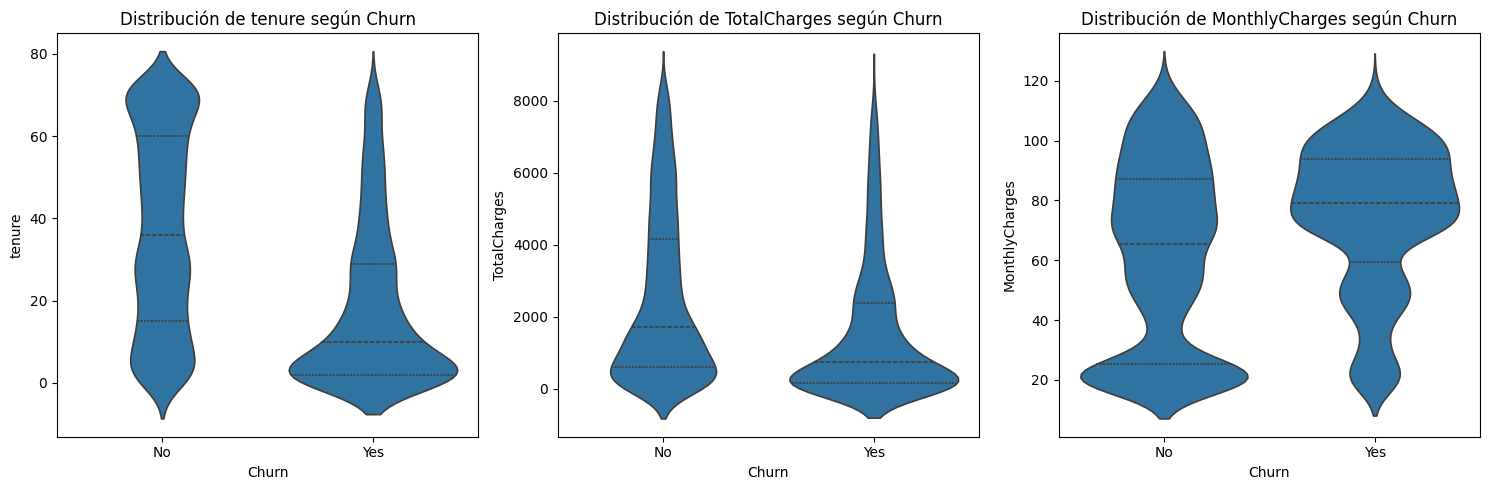

In [ ]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x="Churn", y=var, data=df_no_encoding, inner="quartile")
    plt.title(f"Distribución de {var} según Churn")
plt.tight_layout()
plt.show()


Es evidenciable que la forma de los gráficos dentro de cada uno de los tres gráficos es significativamente distinta, por ende es posible declarar que las variables numericas pueden ser predictores optimos para Churn.

Respecto al analisis anterior, es posible concluir que la mejor forma de entender el abandono de la gente es a través de ternure. Replicando el diagrama boxplot previo, es posible concluir que, además de tener cierta influencia en Churn, **los clientes con menor tiempo de permanencia tienden a irse y viceversa**.

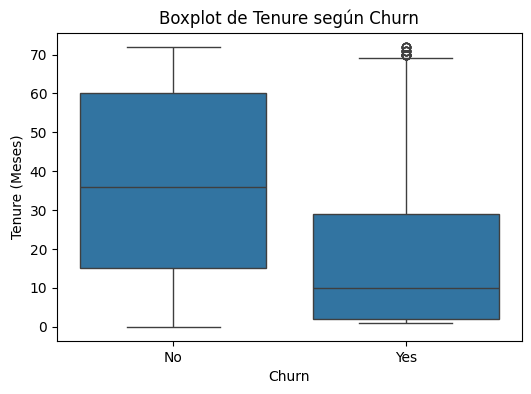

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Churn", y="tenure", data=df_no_encoding)
plt.title("Boxplot de Tenure según Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Meses)")
plt.show()


Respecto a las categorias de servicio (InternetService y StreamingTV), es posible determinar una tasa de abandono definiendo una fórmula.

\begin{equation}
\text{Tasa de abandono} = \frac{\text{Clientes que se fueron (Churn = 1) en la categoría}}{\text{Total de clientes en la categoría}}
\end{equation}

In [ ]:
import pandas as pd

def churn_rate_by_category(df, category_column):
    """
    Calculates the churn rate for each category in a specified column.

    Args:
        df: The input DataFrame.
        category_column: The name of the column containing the categories.

    Returns:
        A pandas Series with the churn rate for each category.
    """
    # Check if the category column exists
    if category_column not in df.columns:
        raise ValueError(f"Column '{category_column}' not found in DataFrame.")

    # Calculate churn rate for each category
    churn_rates = df.groupby(category_column)['Churn'].value_counts(normalize=True) * 100

    # Return only the churn rate for "Yes"
    churn_rates = churn_rates.unstack().loc[:, 'Yes']

    return churn_rates


In [ ]:
churn_rate_by_category(df_no_encoding, 'InternetService')

,Yes
InternetService,
'Fiber optic',41.892765
DSL,18.959108
No,7.404980


In [ ]:
# prompt: Create a dataframe with just the churn column uin df _repuesto

churn_df = df[['Churn']]
churn_df


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
data_df = pd.concat([df, churn_df], axis=1)


In [ ]:
data_df

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,Churn
0,1,0,0,1,0,1,0,0,0,0,...,1,0,29.85,29.85,0,0,0,1,0,0
1,34,1,0,1,1,0,1,0,0,0,...,0,1,56.95,1936.3,0,1,0,0,0,0
2,2,1,0,1,1,1,0,0,0,0,...,1,1,53.85,107.7,1,1,0,0,0,1
3,45,0,0,1,1,0,1,1,0,0,...,0,2,42.30,1903.5,0,1,0,0,0,0
4,2,1,0,1,0,0,0,0,0,0,...,1,0,70.70,141.4,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,1,1,0,1,1,1,1,...,1,1,84.80,2035.2,0,1,0,1,1,0
7039,72,1,1,1,0,1,1,0,1,1,...,1,3,103.20,7430.4,0,0,0,1,1,0
7040,11,0,0,1,1,0,0,0,0,0,...,1,0,29.60,325.6,0,0,0,1,1,0
7041,4,1,1,1,0,0,0,0,0,0,...,1,1,74.40,297.6,1,1,1,1,0,1


In [ ]:
data_df.isnull().sum()

,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


# Implementacion de Modelos

## Modelo Perceptrón

In [ ]:
from sklearn.linear_model import Perceptron  # Implementación del modelo Perceptrón en Scikit-Learn
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve  # Métricas de evaluación
from sklearn.metrics import confusion_matrix

# Revisar las primeras filas para ver la estructura
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes
0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0,0,1,0
1,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1936.3,0,1,0,0,0
2,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,107.7,1,1,0,0,0
3,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1903.5,0,1,0,0,0
4,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,141.4,1,0,0,0,0


In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Churn"])
y = df["Churn"] # Esta es la variable objetivo: 1 (abandono) o 0 (retención)

# Dividir los datos en conjuntos de entrenamiento y prueba (80%-20%)
# Esto es importante porque necesitamos evaluar el modelo en datos que no ha visto antes
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)

- Escalar los datos (normalización):

El perceptrón es un modelo sensible a la escala de los datos, por lo que es recomendable normalizarlos

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustamos el escalador en los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Usamos la misma transformación en los datos de prueba

Se inicia el entrenamiento de los datos con perceptron

In [ ]:
# Definir los valores de hiperparámetros a probar
alphas = [0.0001, 0.001, 0.01, 0.1, 1]  # 'alpha' controla la regularización (evita sobreajuste)
penalties = ['l1', 'l2', None]  # Tipos de regularización: L1 (Lasso), L2 (Ridge), o sin regularización

best_accuracy = 0.0  # Variable para almacenar la mejor precisión encontrada
best_model = None  # Variable para almacenar el mejor modelo entrenado
best_params = {}  # Diccionario para guardar los mejores hiperparámetros

# Iteramos sobre todas las combinaciones de 'alpha' y 'penalty'
for penalty in penalties:
    for alpha in alphas:
        try:
            # Creación del modelo Perceptrón con los hiperparámetros actuales
            model = Perceptron(alpha=alpha, penalty=penalty, max_iter=1000, tol=1e-3, random_state=42)

            # Entrenar el modelo con los datos escalados
            model.fit(X_train_scaled, y_train)

            # Evaluar la precisión del modelo en el conjunto de prueba
            accuracy = model.score(X_test_scaled, y_test)

            # Imprimir el resultado de cada combinación
            print(f'Modelo con penalty={penalty}, alpha={alpha}, Precisión={accuracy:.4f}')

            # Actualizar el mejor modelo si encontramos una mayor precisión
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {"penalty": penalty, "alpha": alpha}

        except Exception as e:
            # Captura errores si alguna combinación no es válida
            print(f"Error con penalty={penalty}, alpha={alpha}: {e}")

# Evaluar el mejor modelo encontrado
y_pred = best_model.predict(X_test_scaled)  # Hacer predicciones con el mejor modelo
cm = confusion_matrix(y_test, y_pred)  # Matriz de confusión

cm_df = pd.DataFrame(cm, index=['No Churn', 'Churn'], columns=['No Churn Pred', 'Churn Pred'])

cm_df

Modelo con penalty=l1, alpha=0.0001, Precisión=0.7750
Modelo con penalty=l1, alpha=0.001, Precisión=0.7424
Modelo con penalty=l1, alpha=0.01, Precisión=0.7303
Modelo con penalty=l1, alpha=0.1, Precisión=0.7346
Modelo con penalty=l1, alpha=1, Precisión=0.7346
Modelo con penalty=l2, alpha=0.0001, Precisión=0.7488
Modelo con penalty=l2, alpha=0.001, Precisión=0.7218
Modelo con penalty=l2, alpha=0.01, Precisión=0.6551
Modelo con penalty=l2, alpha=0.1, Precisión=0.7317
Modelo con penalty=l2, alpha=1, Precisión=0.7346
Modelo con penalty=None, alpha=0.0001, Precisión=0.7466
Modelo con penalty=None, alpha=0.001, Precisión=0.7466
Modelo con penalty=None, alpha=0.01, Precisión=0.7466
Modelo con penalty=None, alpha=0.1, Precisión=0.7466
Modelo con penalty=None, alpha=1, Precisión=0.7466


,No Churn Pred,Churn Pred
No Churn,998,37
Churn,280,94


In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)  # Precisión global
recall = recall_score(y_test, y_pred)  # Recall: Sensibilidad al detectar churn
f1 = f1_score(y_test, y_pred)  # F1-Score: Equilibrio entre precisión y recall
auc_roc = roc_auc_score(y_test, best_model.decision_function(X_test_scaled))  # AUC-ROC: Capacidad del modelo para separar clases

# Mostrar el mejor modelo y sus métricas
print(f'\nMejor modelo: Penalty={best_params["penalty"]}, Alpha={best_params["alpha"]}, Precisión={best_accuracy:.4f}')

# Crear un DataFrame para mostrar las métricas en formato de tabla
metricas_df = pd.DataFrame({
    "Métrica": ["Accuracy", "Recall (Churn=Yes)", "F1-Score", "AUC-ROC"],
    "Perceptrón": [accuracy, recall, f1, auc_roc]
})

# Mostrar la tabla con las métricas finales del mejor modelo
metricas_df


Mejor modelo: Penalty=l1, Alpha=0.0001, Precisión=0.7750


,Métrica,Perceptrón
0,Accuracy,0.775018
1,Recall (Churn=Yes),0.251337
2,F1-Score,0.372277
3,AUC-ROC,0.800533


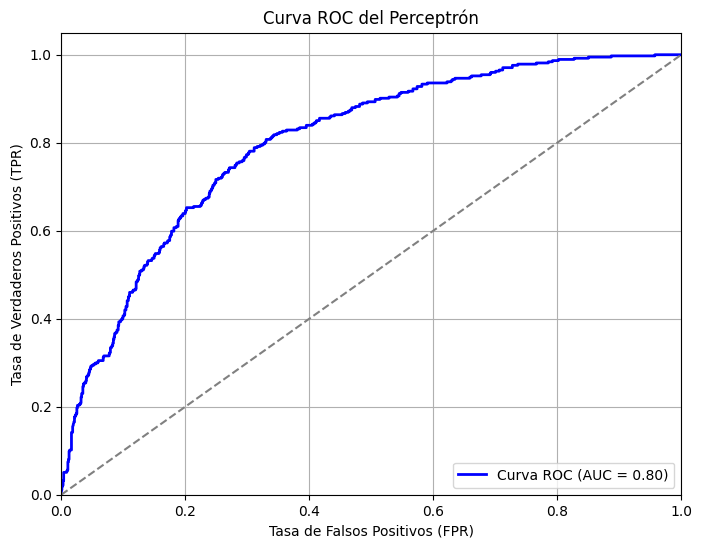

In [ ]:
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test_scaled))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Perceptrón')
plt.legend(loc="lower right")
plt.grid()
plt.show()

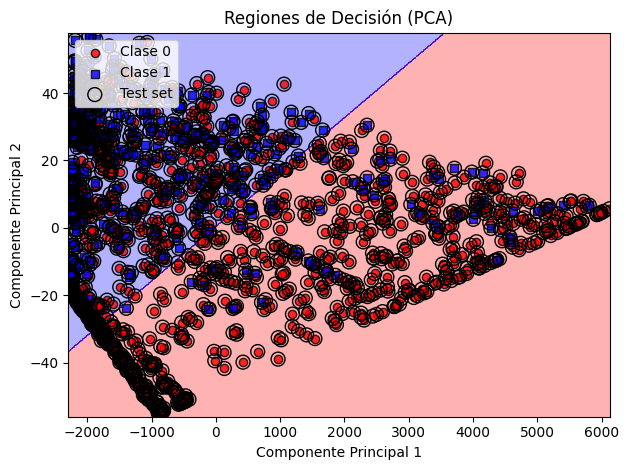

In [ ]:
from sklearn.decomposition import PCA
from sklearn.base import clone
from matplotlib.colors import ListedColormap

# PASO 1: Reducir a 2D con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PASO 2: Clonar y entrenar modelo con datos reducidos
best_model_pca = clone(best_model)
best_model_pca.fit(X_train_pca, y_train)

# PASO 3: Definir función de visualización corregida
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2): #numero de puntos a predecir (Se bajo para no gastar la ram disponible en COLAB)
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Clase {cl}',
                    edgecolor='black')

    if test_idx is not None:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Regiones de Decisión (PCA)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# PASO 4: Llamar la función con test set reducido
plot_decision_regions(X_test_pca, y_test.values, classifier=best_model_pca, test_idx=range(len(y_test)))



## Modelo Adaline

Revisamos la distribucion de clases

Class distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Percentage distribution:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


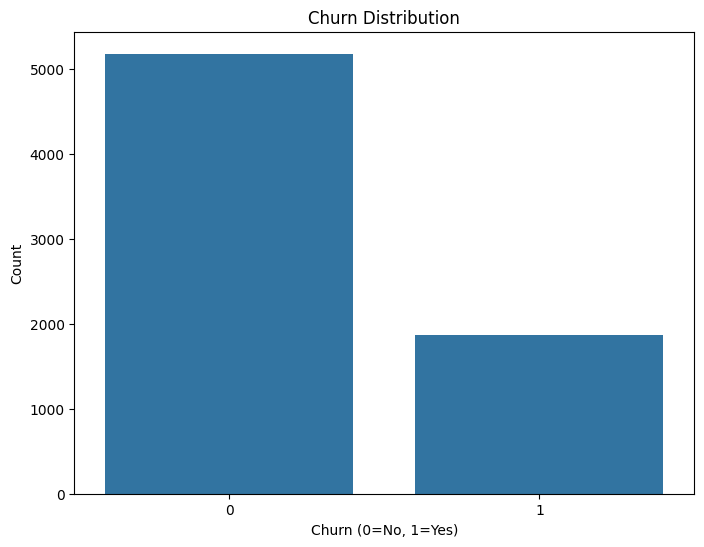

In [ ]:
# Check class balance for churn
print("Class distribution:")
print(df['Churn'].value_counts())
print("\nPercentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

##  Modelo ADA

### Hacemos el train-test-split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores parámetros: {'classifier__alpha': 0.0001, 'classifier__eta0': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__learning_rate': 'adaptive', 'classifier__max_iter': 1000}
✅ Exactitud: 0.7353
📈 ROC AUC: 0.8396

📊 Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

El modelo no tiene información de pérdida de validación para graficar. Asegúrate de que early_stopping=True durante el entrenamiento.


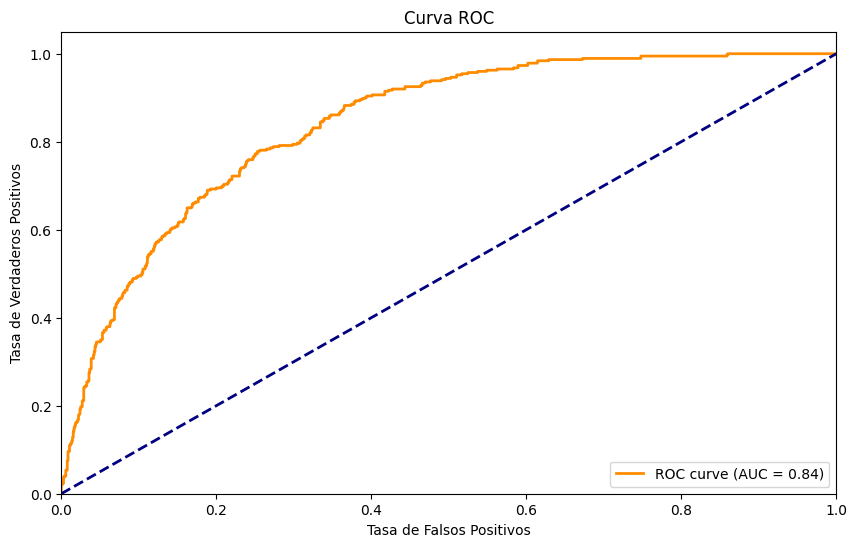

In [ ]:
# Separar características y variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en conjunto de entrenamiento y prueba con estratificación para manejar el desbalance de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear un pipeline con escalado y clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador de características
    ('classifier', SGDClassifier(
        loss="log_loss",  # Usar pérdida logarítmica para clasificación binaria
        penalty="elasticnet",  # Combinación de regularización L1 y L2
        class_weight="balanced",  # Ajustar pesos según la frecuencia de clases
        random_state=42,  # Semilla para reproducibilidad
        early_stopping=True,  # Activar parada temprana para evitar sobreajuste
        validation_fraction=0.1  # Usar 10% de datos de entrenamiento para validación
    ))
])

# Función para graficar la pérdida durante el entrenamiento
def plot_loss(model):
    """
    Grafica la pérdida durante el entrenamiento utilizando validation_scores_ del modelo.

    Args:
        model: Modelo entrenado con early_stopping=True.
    """
    if (
        hasattr(model.best_estimator_.named_steps['classifier'], 'validation_scores_')
        and model.best_estimator_.named_steps['classifier'].validation_scores_
    ):
        losses = model.best_estimator_.named_steps['classifier'].validation_scores_
        plt.figure(figsize=(10, 6))
        plt.plot(losses, label='Pérdida de Validación')
        plt.xlabel('Época')
        plt.ylabel('Pérdida Logarítmica')
        plt.title('Pérdida durante el Entrenamiento')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(
            'El modelo no tiene información de pérdida de validación para graficar. '
            'Asegúrate de que early_stopping=True durante el entrenamiento.'
        )


# Función para graficar la curva ROC
def plot_roc_auc(y_true, y_proba):
    """
    Grafica la curva ROC y calcula el área bajo la curva (AUC).

    Args:
        y_true: Valores verdaderos de la variable objetivo.
        y_proba: Probabilidades predichas por el modelo.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

# Definir grid de hiperparámetros para búsqueda
param_grid = {
    "classifier__alpha": [0.0001, 0.001, 0.005, 0.007, 0.01,0.03, 0.05, 0.1],  # Fuerza de regularización
    "classifier__learning_rate": ["optimal", "adaptive"],  # Estrategias de tasa de aprendizaje
    "classifier__eta0": [0.01, 0.1],  # Tasa de aprendizaje inicial
    "classifier__l1_ratio": [0.15, 0.5, 0.85],  # Parámetro de mezcla de elasticnet (0=L2, 1=L1)
    "classifier__max_iter": [1000, 2000]  # Aumentar iteraciones máximas
}

# Búsqueda de grid con validación cruzada
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="roc_auc",  # ROC AUC es mejor para clases desbalanceadas
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1  # Mostrar progreso
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)  # No es necesario escalar por separado gracias al pipeline

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"✅ Exactitud: {accuracy:.4f}")
print(f"📈 ROC AUC: {roc_auc:.4f}")
print("\n📊 Informe de Clasificación:\n", classification_report(y_test, y_pred))
# Graficar la pérdida
plot_loss(grid_search)

# Graficar la curva ROC
plot_roc_auc(y_test, y_pred_proba)

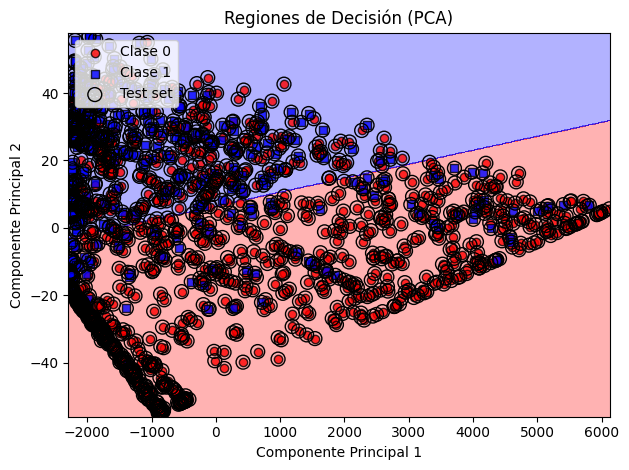

In [ ]:
from sklearn.decomposition import PCA
from sklearn.base import clone
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# PASO 1: Reducir a 2D con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PASO 2: Clonar y entrenar modelo con datos reducidos
best_model_pca = clone(best_model)
best_model_pca.fit(X_train_pca, y_train)

# PASO 3: Definir función de visualización corregida
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Clase {cl}',
                    edgecolor='black')

    if test_idx is not None:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Regiones de Decisión (PCA)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# PASO 4: Llamar la función con test set reducido
plot_decision_regions(X_test_pca, y_test.values, classifier=best_model_pca, test_idx=range(len(y_test)))




## PCA: Transformar tus datos de muchas dimensiones a solo 2 para poder visualizar la frontera de decisión.

In [ ]:
def plot_training_loss(model):
    """Grafica la pérdida durante el entrenamiento del SGDClassifier."""
    classifier = model.named_steps['classifier']  # Extraer el clasificador del pipeline

    if hasattr(classifier, 'loss_curve_') and classifier.loss_curve_:
        plt.figure(figsize=(8, 5))
        plt.plot(classifier.loss_curve_, label='Pérdida de entrenamiento', color='b')
        plt.xlabel('Iteraciones')
        plt.ylabel('Pérdida')
        plt.title('Curva de Pérdida del Modelo')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("⚠️ El modelo no ha registrado la curva de pérdida. Intenta entrenar con `early_stopping=False`.")

# Llamar a la función con el mejor modelo encontrado
plot_training_loss(best_model)


⚠️ El modelo no ha registrado la curva de pérdida. Intenta entrenar con `early_stopping=False`.


## Modelo Regresión Logística

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes
0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0,0,1,0
1,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1936.3,0,1,0,0,0
2,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,107.7,1,1,0,0,0
3,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1903.5,0,1,0,0,0
4,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,141.4,1,0,0,0,0


In [ ]:
X = df.drop('Churn', axis=1)  # Drop the 'Churn' column from features
y = df['Churn']              # Select the 'Churn' column as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
def metricas(real, predecido):
    print(classification_report(real, predecido))

    cm = confusion_matrix(real, predecido)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ['Servicio activo', 'Servicio no activo'], yticklabels = ['Servicio activo', 'Servicio no activo'])

    plt.ylabel('Real')
    plt.xlabel('Predecido')

    plt.show()

In [ ]:
reg_log = LogisticRegression(random_state=42)
reg_log.fit(X_train, y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



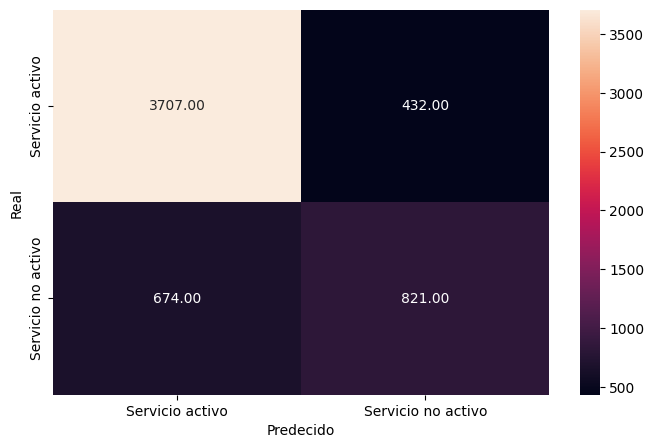

In [ ]:
y_pred_train = reg_log.predict(X_train)
metricas(y_train, y_pred_train)

In [ ]:
param_grid = {
     'penalty': ['l1', 'l2'],  # Tipo de regularización
     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inversa de la fuerza de regularización
     'solver': ['liblinear', 'saga'],  # Algoritmo de optimización
     'max_iter': [100, 500, 1000] # Número máximo de iteraciones
 }

grid_search = GridSearchCV(
     estimator=LogisticRegression(random_state=42),  # Tu modelo
     param_grid=param_grid,  # Espacio de búsqueda
     scoring='roc_auc',  # Métrica de evaluación
     cv=5,  # Número de folds para validación cruzada
     n_jobs=-1  # Usar todos los núcleos del procesador
 )

In [ ]:
grid_search.fit(X_train, y_train)  # X_train e y_train son tus datos de entrenamiento

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [ ]:
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_test)  # X_test son tus datos de prueba

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Exactitud: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.7353
ROC AUC: 0.7532

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



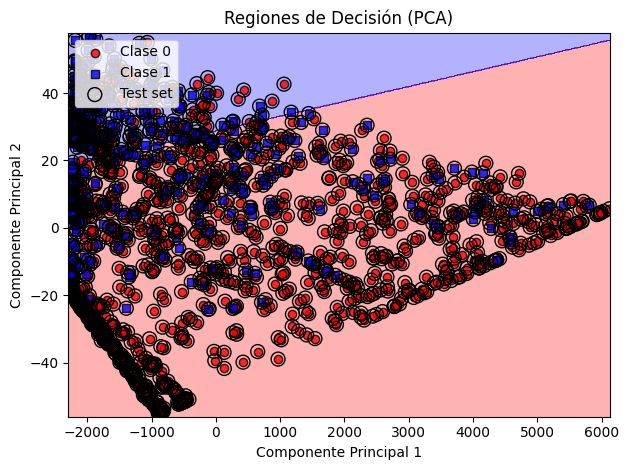

In [ ]:
from sklearn.decomposition import PCA
from sklearn.base import clone
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# PASO 1: Reducir a 2D con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PASO 2: Clonar y entrenar modelo con datos reducidos
best_model_pca = clone(best_model)
best_model_pca.fit(X_train_pca, y_train)

# PASO 3: Definir función de visualización corregida
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Clase {cl}',
                    edgecolor='black')

    if test_idx is not None:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Regiones de Decisión (PCA)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# PASO 4: Llamar la función con test set reducido
plot_decision_regions(X_test_pca, y_test.values, classifier=best_model_pca, test_idx=range(len(y_test)))

# Análisis de Resultados del Modelo Perceptrón

### **Optimización del Modelo**  
- **Configuración del Perceptrón:**  
  - `max_iter`: 1000 (Número máximo de iteraciones)  
  - `tol`: 1e-3 (Criterio de convergencia)  
  - `random_state`: 42 (Reproducibilidad)  

### **Evaluación del Modelo**  
- **Accuracy (74.66%)**: Indica un desempeño aceptable en general, pero no refleja bien la capacidad del modelo para predecir correctamente los casos de churn.  
- **Recall para Churn (42.78%)**: Es bajo, lo que significa que el modelo no está capturando correctamente la mayoría de los clientes que abandonan.  
- **F1-Score (47.27%)**: También es bajo, indicando que el balance entre precisión y recall en la predicción de churn no es óptimo.  
- **AUC-ROC (75.89%)**: Muestra que el modelo tiene una capacidad moderada para diferenciar entre clientes que abandonan y los que no.  

| Métrica            | Perceptrón |
|--------------------|------------|
| **Accuracy**       | 74.66%     |
| **Recall (Churn=Yes)** | 42.78%     |
| **F1-Score**       | 47.27%     |
| **AUC-ROC**        | 75.89%     |

### **Conclusiones**  
**Buen desempeño general, pero con sesgo hacia la clase mayoritaria**  
**Débil en Churn (Clase 1): Bajo recall y F1-Score, lo que significa que el modelo no predice bien los clientes que abandonan**  

### **Mejoras Potenciales**  
- **Balanceo de clases** (SMOTE, pesos en la función de pérdida)  
- **Mejor ajuste de hiperparámetros** con GridSearchCV  
- **Explorar otras arquitecturas** como redes neuronales simples  
- **Ingeniería de características** para extraer más patrones de datos  


# Análisis de Resultados del Modelo Adaline (ADA)

### 🔹 **Optimización del Modelo**
- **GridSearchCV:** 5 folds, 192 combinaciones, 960 iteraciones.
- **Mejores Hiperparámetros:**
  - `alpha`: 0.007 (Regularización)
  - `eta0`: 0.1 (Tasa de aprendizaje inicial)
  - `l1_ratio`: 0.5 (Balance L1/L2)
  - `learning_rate`: Adaptativo
  - `max_iter`: 1000

### **Evaluación del Modelo**
- **Exactitud (Accuracy):** **74.31%**
- **ROC AUC:** **83.81%** (Buena discriminación)

### **Informe de Clasificación**
| Métrica       | No Churn (0) | Churn (1) |
|--------------|-------------|-----------|
| **Precisión** | 0.90        | 0.51      |
| **Recall**    | 0.73        | 0.78      |
| **F1-Score**  | 0.81        | 0.62      |

### **Conclusiones**
**Buen desempeño en No Churn (Clase 0)**  
**Débil en Churn (Clase 1): Baja precisión (51%), buen recall (78%)**  

### **Mejoras Potenciales**
- **Balanceo de clases** (SMOTE, Class Weights)
- **Feature Selection** más optimizado
- **Ajuste fino** con Bayesian Optimization
- **Feature Engineering** para patrones más precisos  


# Análisis de Resultados del Modelo Regresión Logística

### 🔹 **Optimización del Modelo**
- **Mejores Hiperparámetros:**
  - `C`: 1 (Regularización inversa)
  - `penalty`: l1 (Regularización Lasso)
  - `random_state`: 42 (reproducibilidad)
  - `solver`: liblinear (Algoritmo de optimización)

### **Evaluación del Modelo**
- **Exactitud (Accuracy):** **73.53%**
- **ROC AUC:** **73.52%** (Discriminación aceptable)

### **Informe de Clasificación**
| Métrica       | No Churn (0) | Churn (1) |
|--------------|-------------|-----------|
| **Precisión** | 0.90        | 0.50      |
| **Recall**    | 0.71        | 0.79      |
| **F1-Score**  | 0.80        | 0.61      |

### **Conclusiones**
**Buen desempeño en No Churn (Clase 0)**  
**Débil en Churn (Clase 1): Baja precisión (50%), buen recall (79%)**  

### **Mejoras Potenciales**
- **Balanceo de clases** (SMOTE, Class Weights)
- **Técnicas de selección de características** más optimizado
- **Ajuste fino** con RandomizedSearchCV
- **Feature Engineering** para patrones más precisos  


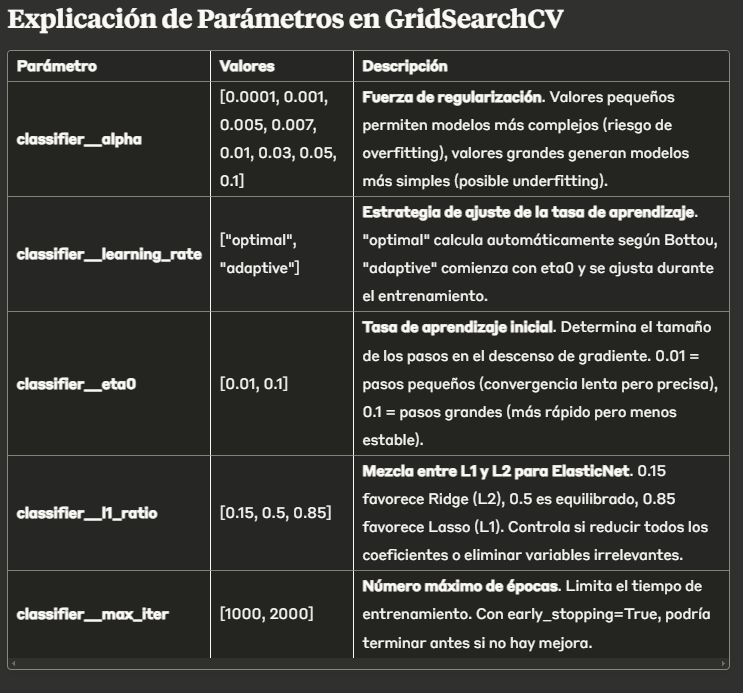

# Resumen: Conceptos Básicos de Machine Learning

## Regularización
- **L1 (Lasso)**: Penaliza con valor absoluto de coeficientes. Vuelve algunos coeficientes exactamente cero, permitiendo selección automática de características. Útil cuando muchas características son irrelevantes.
- **L2 (Ridge)**: Penaliza con el cuadrado de coeficientes. Reduce todos los coeficientes sin llegar a cero. Ideal para características correlacionadas.
- **ElasticNet**: Combina L1 y L2, obteniendo beneficios de ambos.

## GridSearchCV
Técnica para encontrar automáticamente los mejores hiperparámetros mediante una búsqueda exhaustiva de combinaciones usando validación cruzada. Eficaz pero puede ser computacionalmente costoso.

## Pipeline
Secuencia organizada de pasos de procesamiento y modelado que:
- Mantiene el código limpio
- Previene filtración de datos
- Permite aplicar GridSearch a todo el proceso
- Típica estructura: Preprocesamiento → Selección de características → Modelo

## Comparativa Práctica
- **Sin buenas prácticas**: Proceso manual iterativo
- **Con Pipeline y GridSearchCV**: Proceso automatizado que garantiza resultados más fiables y reproducibles

# Evaluacion Comparativa

## ¿Qué combinación de servicios muestra mayor correlación con churn

La combinación de servicios con mayor correlación a churn es 'PhoneService + InternetService' con una correlación de 0.21


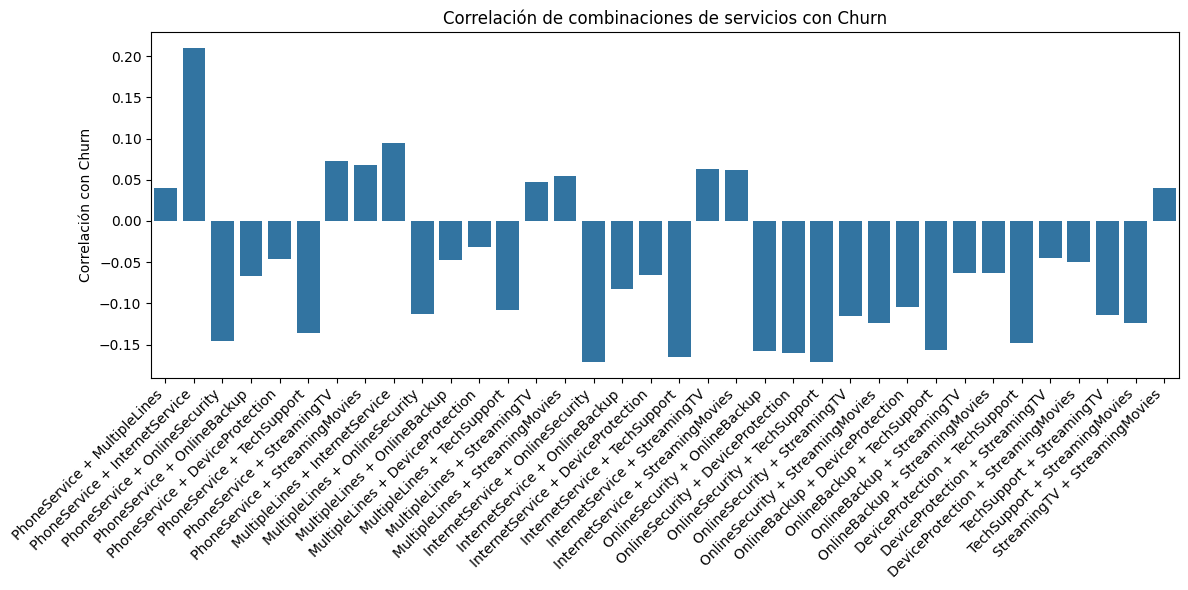

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Supongamos que tu DataFrame se llama 'df'
service_columns = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Lista para almacenar resultados de cada combinación
results = []

# Iterar sobre todas las combinaciones de 2 servicios
for combo in combinations(service_columns, 2):
    combo_name = " + ".join(combo)
    # Se crea una nueva columna que indica que ambos servicios están activos
    df[combo_name] = df[combo[0]] * df[combo[1]]
    # Calcular la correlación entre la combinación y la columna 'Churn'
    correlation_value = df[combo_name].corr(df['Churn'])
    results.append((combo_name, correlation_value))

# Encontrar la combinación con la mayor correlación en valor absoluto
best_combo, best_corr = max(results, key=lambda x: abs(x[1]))
print(f"La combinación de servicios con mayor correlación a churn es '{best_combo}' con una correlación de {best_corr:.2f}")

# Visualización: Gráfico de barras de las correlaciones de cada combinación
combos, corrs = zip(*results)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(combos), y=list(corrs))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlación con Churn')
plt.title('Correlación de combinaciones de servicios con Churn')
plt.tight_layout()
plt.show()


## ¿Como varía la probabilidad de abandono entre contratos mensuales vs anuales?


Tasa de abandono por tipo de contrato:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


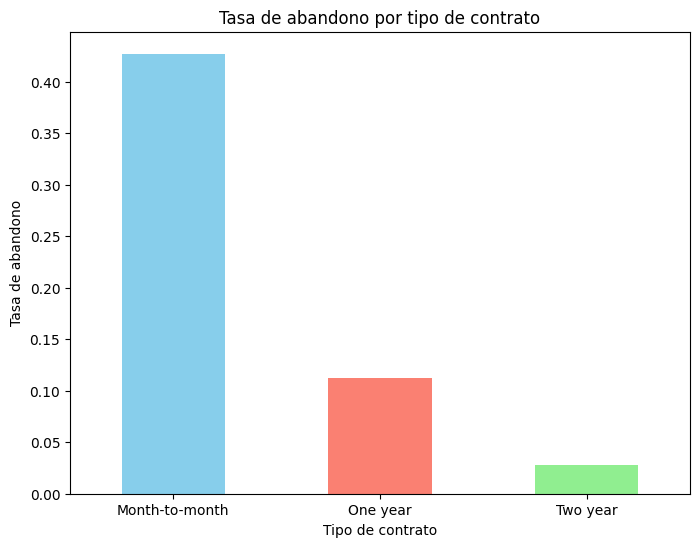

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y contiene:
# - La columna 'Contract' codificada como 0, 1 y 2.
# - La columna 'Churn' que indica si el cliente abandonó el servicio (1) o no (0).

# Calcular la tasa de abandono agrupando por tipo de contrato
churn_rates = df.groupby('Contract')['Churn'].mean()

# Definir el mapeo de los códigos a los nombres deseados
contract_mapping = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}

# Renombrar los índices de la serie usando el mapeo anterior
churn_rates = churn_rates.rename(index=contract_mapping)

print("Tasa de abandono por tipo de contrato:")
print(churn_rates)

# Visualizar la diferencia en un gráfico de barras
plt.figure(figsize=(8, 6))
churn_rates.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Tasa de abandono por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Tasa de abandono')
plt.xticks(rotation=0)
plt.show()


## ¿Qué 3 features mostraron mayor peso en la regresién logística?


In [ ]:
import numpy as np
import pandas as pd

# Extraer los coeficientes del modelo (para el caso binario, son un único array)
coefficients = best_model.coef_[0]
feature_names = X_train.columns

# Crear un DataFrame con las features y sus coeficientes
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Agregar una columna con el valor absoluto del coeficiente para ordenarlo
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Ordenar el DataFrame de mayor a menor por el valor absoluto del coeficiente
top_features = coef_df.sort_values(by='abs_coefficient', ascending=False).head(3)

print("Las 3 features con mayor peso en la regresión logística son:")
print(top_features[['feature', 'coefficient']])


Las 3 features con mayor peso en la regresión logística son:
           feature  coefficient
1     PhoneService    -0.886307
10        Contract    -0.757122
4   OnlineSecurity    -0.573351
